# EDA of Bigquery Google Analytics Data

**Objective :**

Analyzing Google Analytics data from Bigquery using SQL.

**Data Source :**

The sample dataset contains Google Analytics 360 data from the Google Merchandise Store, a real ecommerce store. The Google Merchandise Store sells Google branded merchandise. 

Traffic source data: information about where website visitors originate. This includes data about organic traffic, paid search traffic, display traffic, etc.
Content data: information about the behavior of users on the site. This includes the URLs of pages that visitors look at, how they interact with content, etc.
Transactional data: information about the transactions that occur on the Google Merchandise Store website.

**Work Flow :**

1. Extract data and confirm structure/contents
2. Explore and analyze data
3. Visualize insights and interpret results

In [1]:
# Import necessary libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

%matplotlib inline

# 1. Data Extraction

In [2]:
from google.cloud import bigquery

# Create client object
client = bigquery.Client()

# Create dataset reference
dataset_ref = client.dataset("google_analytics_sample", project="bigquery-public-data")

# Retrieve dataset from reference
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


In [3]:
# View tables in dataset
[x.table_id for x in client.list_tables(dataset)][:5]

['ga_sessions_20160801',
 'ga_sessions_20160802',
 'ga_sessions_20160803',
 'ga_sessions_20160804',
 'ga_sessions_20160805']

In [4]:
# Create table reference
table_ref_20160801 = dataset_ref.table('ga_sessions_20160801')

# Retrieve table from reference
table_20160801 = client.get_table(table_ref_20160801)

# View columns
client.list_rows(table_20160801, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.



,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,NaN,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,NaN,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,NaN,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged
3,NaN,4,1470075581,1470075581,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 19, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8520115029387302083,None,Referral,Not Socially Engaged
4,NaN,30,1470099026,1470099026,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",6792260745822342947,None,Organic Search,Not Socially Engaged


**Schema Interaction**

In [5]:
# Display schemas
print("SCHEMA field for the 'totals' column:\n")
print(table_20160801.schema[5])

print("\nSCHEMA field for the 'trafficSource' column:\n")
print(table_20160801.schema[6])

print("\nSCHEMA field for the 'device' column:\n")
print(table_20160801.schema[7])

print("\nSCHEMA field for the 'geoNetwork' column:\n")
print(table_20160801.schema[8])

print("\nSCHEMA field for the 'customDimensions' column:\n")
print(table_20160801.schema[9])

print("\nSCHEMA field for the 'hits' column:\n")
print(table_20160801.schema[10])

SCHEMA field for the 'totals' column:

SchemaField('totals', 'RECORD', 'NULLABLE', None, (SchemaField('visits', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('hits', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('pageviews', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('timeOnSite', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('bounces', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('transactions', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('transactionRevenue', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('newVisits', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('screenviews', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('uniqueScreenviews', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('timeOnScreen', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('totalTransactionRevenue', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('sessionQualityDim', 'INTEGER', 'NULLABLE', None, (), None)), None)

SCHEMA field for th

# 2. Explore and Analyze Data

Analyzing the most frequently visited landing pages and their respective bounce rates.

A high bounce rate can indicate either:

1. Users are not seeing what they expect when they enter the site, and Search Engine Optimization (SEO) needs to be done
2. There is a functionality or display issue with the landing page

In [6]:
# 「ｈitＮumber=1」Indicates the first hit of a session
query = """
        SELECT 
            hits.page.pagePath AS landing_page,
            COUNT(*) AS views,
            SUM(totals.bounces)/COUNT(*) AS bounce_rate
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            hits.type='PAGE'
            AND
            hits.hitNumber=1
        GROUP BY landing_page
        ORDER BY views DESC
        LIMIT 10
        """

result = client.query(query).result().to_dataframe()
result.head(10)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning:

Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.



,landing_page,views,bounce_rate
0,/home,612140,0.495475
1,/google+redesign/shop+by+brand/youtube,81512,0.562347
2,/google+redesign/apparel/men++s/men++s+t+shirts,20685,0.441141
3,/signin.html,16296,0.361622
4,/google+redesign/apparel/mens/mens+t+shirts,12691,0.475061
5,/basket.html,9431,0.454565
6,/google+redesign/drinkware,8833,0.533794
7,/google+redesign/bags,8608,0.451208
8,/google+redesign/apparel/men++s/men++s+outerwear,6345,0.432782
9,/google+redesign/apparel,6326,0.448150


Looking at the bounce rates, it looks like Men's Apparel and Bags are comparatively lower than the other pages.

We can also see that the YouTube and Drinkware pages have a lot of views, but have a high bounce rate, indicating either a problem with the page's functionality, or users not seeing what they were expecting to when they entered the site.

Analyzing Exit rate

A high exit rate can indicate either:

1. Users are not seeing what they expect when they navigate to a page
2. There is a functionality or display issue with the page

In [7]:
query = """
        SELECT 
            hits.page.pagePath AS page,
            COUNT(*) AS views,
            SUM(totals.bounces)/COUNT(*) AS exit_rate
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            hits.type='PAGE'
        GROUP BY page
        ORDER BY views DESC
        """

result = client.query(query).result().to_dataframe()
result.head(20)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning:

Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.



,page,views,exit_rate
0,/home,981285,0.309920
1,/basket.html,209360,0.020524
2,/google+redesign/shop+by+brand/youtube,145026,0.316198
3,/signin.html,101299,0.058322
4,/store.html,93551,0.025505
5,/google+redesign/apparel/men++s/men++s+t+shirts,67471,0.135392
6,/asearch.html,62380,0.031677
7,/google+redesign/electronics,56839,0.047116
8,/google+redesign/apparel,56552,0.050272
9,/google+redesign/bags,53686,0.072458


Compared with other pages, exit rates for pages related to Men's Apparel are slightly high, and the exit rate for YouTube is very high.

 Checking sessions by browser and device to see compatibility issues if.

In [8]:
query = """
        SELECT 
            device.Browser AS browser,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY browser
        ORDER BY sessions DESC
        LIMIT 10
        """

result = client.query(query).result().to_dataframe()
result.head(10)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning:

Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.



,browser,sessions,exit_rate
0,Chrome,3197849,0.091878
1,Safari,629906,0.157622
2,Firefox,133880,0.168195
3,Internet Explorer,62405,0.190369
4,Edge,38063,0.150934
5,Android Webview,25979,0.174872
6,Safari (in-app),19037,0.213532
7,Opera,15439,0.209988
8,Opera Mini,12767,0.314639
9,UC Browser,5807,0.283968


Among the top 5 browsers, the exit rate for Chrome is comparatively low at 9%, while the other browsers are roughly 7% - 8% higher with the exception of Internet Explorer, having an exit rate of 19%.

In [9]:
query = """
        SELECT 
            device.deviceCategory AS device,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY device
        ORDER BY sessions DESC
        """

result = client.query(query).result().to_dataframe()
result.head(10)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning:

Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.



,device,sessions,exit_rate
0,desktop,3171344,0.104038
1,mobile,838327,0.130486
2,tablet,144004,0.105907


Looking at the exit rates, we can see that Mobile is about 2.5% higher than other devices. It's possible that the site is not optimized for mobile viewing.

Checking session and transaction data for each source of traffic to site.

In [10]:
query = """
        SELECT 
            trafficSource.medium AS medium,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate,
            SUM(totals.transactions) AS transactions,
            SUM(totals.totalTransactionRevenue)/1000000 AS total_revenue,
            SUM(totals.transactions)/COUNT(*) AS conversion_rate
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY medium
        ORDER BY sessions DESC
        LIMIT 10
        """

result = client.query(query).result().to_dataframe()
result.head(10)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning:

Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.



,medium,sessions,exit_rate,transactions,total_revenue,conversion_rate
0,(none),2246040,0.069684,363228,69842914.68,0.161719
1,organic,1141113,0.101857,97332,19504702.25,0.085296
2,referral,580309,0.285806,22040,3501224.27,0.037980
3,cpc,88591,0.055028,9457,1528330.72,0.106749
4,affiliate,55860,0.157698,334,29118.69,0.005979
5,cpm,41253,0.054372,5951,8676307.66,0.144256
6,(not set),509,0.108055,17,203.83,0.033399


Most of the traffic is either Organic or Referral.

Also the conversion rate for CPC and CPM is quite high compared to other sources.

Identifing the customer's conversion path through the site, as well as areas in the conversion process where users are leaving the site.

In [11]:
# Aggregate hits by action type
query = """
        SELECT 
            CASE WHEN hits.eCommerceAction.action_type = '1' THEN 'Click through of product lists'
                 WHEN hits.eCommerceAction.action_type = '2' THEN 'Product detail views'
                 WHEN hits.eCommerceAction.action_type = '5' THEN 'Check out'
                 WHEN hits.eCommerceAction.action_type = '6' THEN 'Completed purchase'
            END AS action,
            COUNT(fullVisitorID) AS users,
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            (
            hits.eCommerceAction.action_type != '0' 
            AND 
            hits.eCommerceAction.action_type != '3' 
            AND 
            hits.eCommerceAction.action_type != '4'
            )
        GROUP BY action
        ORDER BY users DESC
        """

result = client.query(query).result().to_dataframe()
result.head(10)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning:

Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.



,action,users
0,Click through of product lists,445760
1,Product detail views,362607
2,Check out,248936
3,Completed purchase,74457


In [12]:
# Create funnel graph
fig = go.Figure(go.Funnel(y = result['action'], x = result['users'], textposition = 'inside', textinfo = 'value+percent initial'))
fig.update_layout(title_text = 'Google Merchandise Store Conversion Path')

fig.show()

69% of users who viewed the product details proceeded to the check out page.

Of those users, only 30% actually completed a purchase.

Identify Best-Selling Product Categories and Forecast Demand

The best-selling categories are related to Apparel, with Men's-T-Shirts being near the top. Also the Office, Electronics, and Water Bottles and Tumblers are selling well.

7-day moving average for transactions for Mens t-shirt.

In [13]:
query = """ 
        SELECT
            product.v2ProductCategory AS category,
            SUM(totals.transactions) AS transactions,
            SUM(totals.totalTransactionRevenue)/1000000 AS total_revenue
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY category
        ORDER BY total_revenue DESC
        LIMIT 10
        """

cat_result = client.query(query).result().to_dataframe()
cat_result.head(10)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning:

Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.



,category,transactions,total_revenue
0,(not set),155239,51801830.97
1,Apparel,133504,44923859.06
2,Home/Apparel/Men's/Men's-T-Shirts/,147131,25222312.08
3,Home/Office/,100994,20222511.87
4,Home/Electronics/,62603,13716689.08
5,Office,41837,12733564.97
6,Home/Apparel/,61127,11863650.76
7,Home/Apparel/Women's/Women's-T-Shirts/,58134,11448008.84
8,Home/Drinkware/Water Bottles and Tumblers/,44300,10600034.98
9,Home/Apparel/Men's/,77731,9781940.51


/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning:

Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.



<AxesSubplot:title={'center':"Men's T-Shirts Weekly Moving Average"}, xlabel='date'>

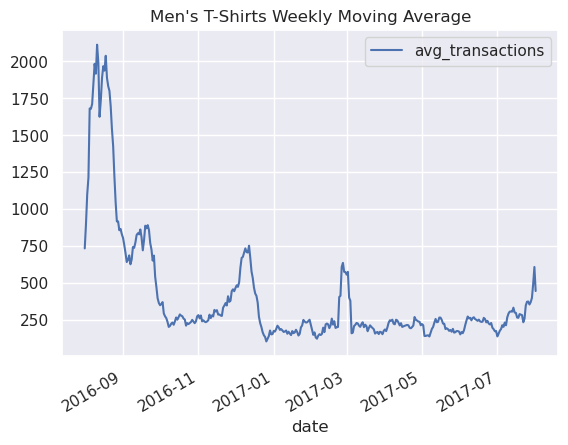

In [14]:
query = """ 
        WITH daily_mens_tshirt_transactions AS
        (
        SELECT 
            date,
            SUM(totals.transactions) AS transactions
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Apparel/Men's/Men's-T-Shirts/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING    
                 ) AS avg_transactions
        FROM 
            daily_mens_tshirt_transactions
        """

result = client.query(query).result().to_dataframe()
result['date'] = pd.to_datetime(result['date'])
result.plot(y='avg_transactions', x='date', kind='line', title='Men\'s T-Shirts Weekly Moving Average')

<AxesSubplot:title={'center':'Drinkware Weekly Moving Average'}, xlabel='date'>

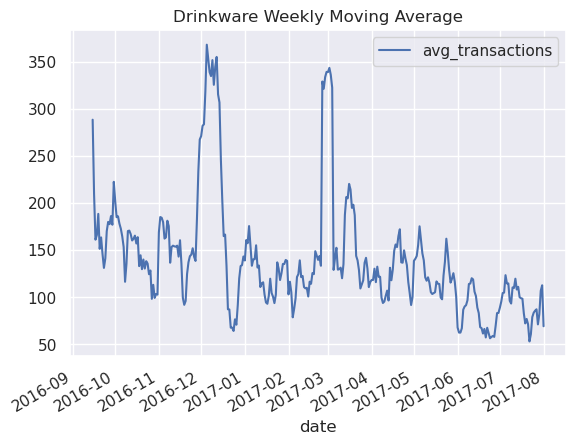

In [15]:
query = """ 
        WITH daily_drinkware_transactions AS
        (
        SELECT 
            date,
            SUM(totals.transactions) AS transactions
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Drinkware/Water Bottles and Tumblers/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING    
                 ) AS avg_transactions
        FROM 
            daily_drinkware_transactions
        """

result = client.query(query).result().to_dataframe()
result['date'] = pd.to_datetime(result['date'])
result.plot(y='avg_transactions', x='date', kind='line', title='Drinkware Weekly Moving Average')

<AxesSubplot:title={'center':'Electronics Weekly Moving Average'}, xlabel='date'>

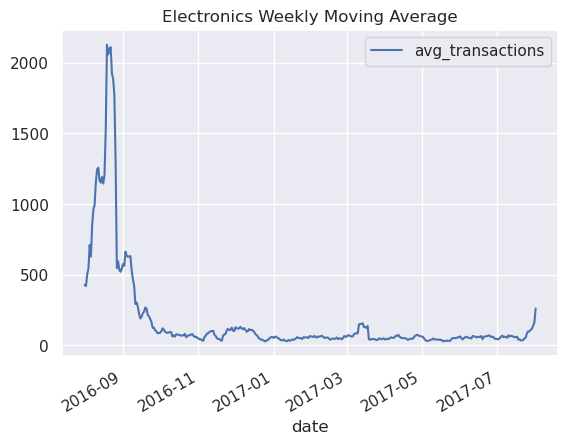

In [16]:
query = """ 
        WITH daily_electronics_transactions AS
        (
        SELECT 
            date,
            SUM(totals.transactions) AS transactions
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Electronics/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING    
                 ) AS avg_transactions
        FROM 
            daily_electronics_transactions
        """

result = client.query(query).result().to_dataframe()
result['date'] = pd.to_datetime(result['date'])
result.plot(y='avg_transactions', x='date', kind='line', title='Electronics Weekly Moving Average')

<AxesSubplot:title={'center':'Office Weekly Moving Average'}, xlabel='date'>

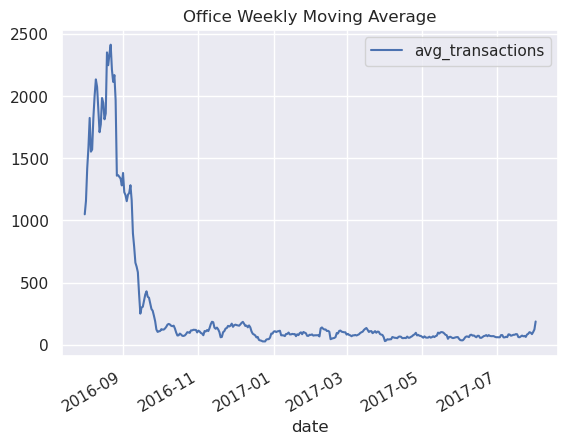

In [17]:
query = """ 
        WITH daily_office_transactions AS
        (
        SELECT 
            date,
            SUM(totals.transactions) AS transactions
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Office/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING    
                 ) AS avg_transactions
        FROM 
            daily_office_transactions
        """

result = client.query(query).result().to_dataframe()
result['date'] = pd.to_datetime(result['date'])
result.plot(y='avg_transactions', x='date', kind='line', title='Office Weekly Moving Average')

Office and Electronics products seem to have steady demand year-round, Drinkware seems to see a spike in demand in December and March, and demand for Men's T-Shirts seem to increase in September, March, and August.

# 3. Visualize Insights

Most visited landing pages and their respective bounce rates:

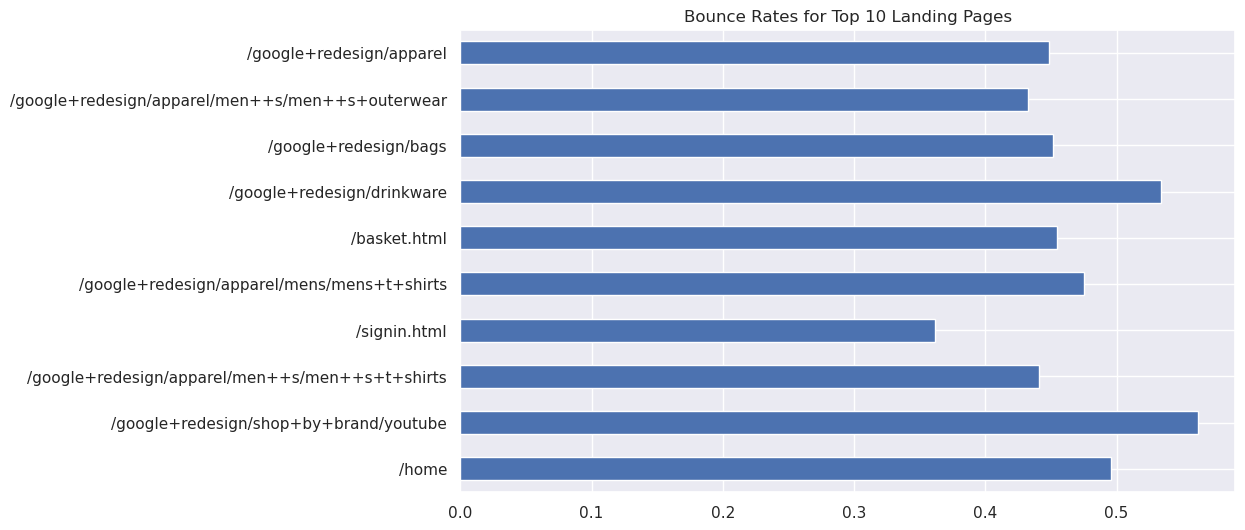

In [18]:
query = """
        SELECT 
            hits.page.pagePath AS landing_page,
            COUNT(*) AS views,
            SUM(totals.bounces)/COUNT(*) AS bounce_rate
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            hits.type='PAGE'
            AND
            hits.hitNumber=1
        GROUP BY landing_page
        ORDER BY views DESC
        LIMIT 10
        """

result = client.query(query).result().to_dataframe()
fig, ax = plt.subplots(figsize=(10,6))
result.plot(y=['bounce_rate'], x='landing_page', kind='barh', legend=False, title='Bounce Rates for Top 10 Landing Pages', ax=ax)
ax.set_ylabel('')

plt.show()

Browser and Device

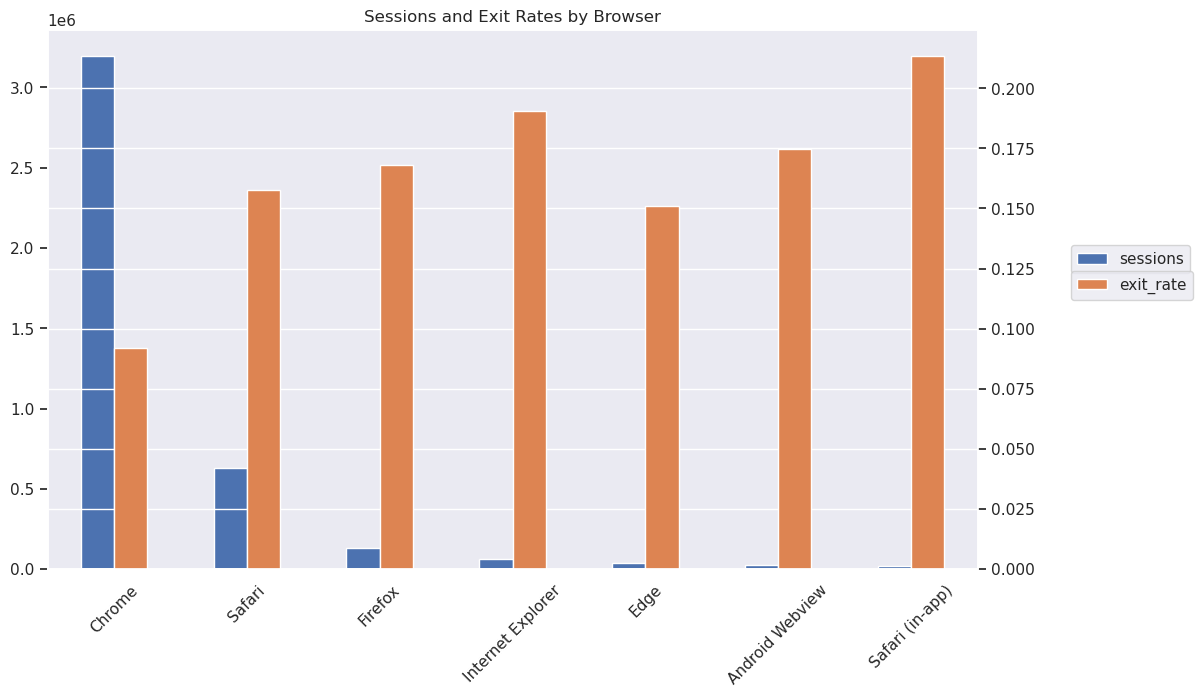

In [19]:
query = """
        SELECT 
            device.Browser AS browser,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY browser
        ORDER BY sessions DESC
        LIMIT 7
        """

result = client.query(query).result().to_dataframe()
fig, ax = plt.subplots(figsize=(12,7))
result.plot(y=['sessions', 'exit_rate'], x='browser', kind='bar', secondary_y='exit_rate', ax=ax, mark_right=False, title='Sessions and Exit Rates by Browser')
# sns.barplot(data=result, x='browser', y='sessions')
# sns.barplot(data=result, x='browser', y='exit_rate')
ax.set_xticklabels(labels=result['browser'], rotation=45)
ax.set_xlabel('')
ax.legend(loc=(1.1, 0.55))
plt.legend(loc=(1.1, 0.5))

plt.show()

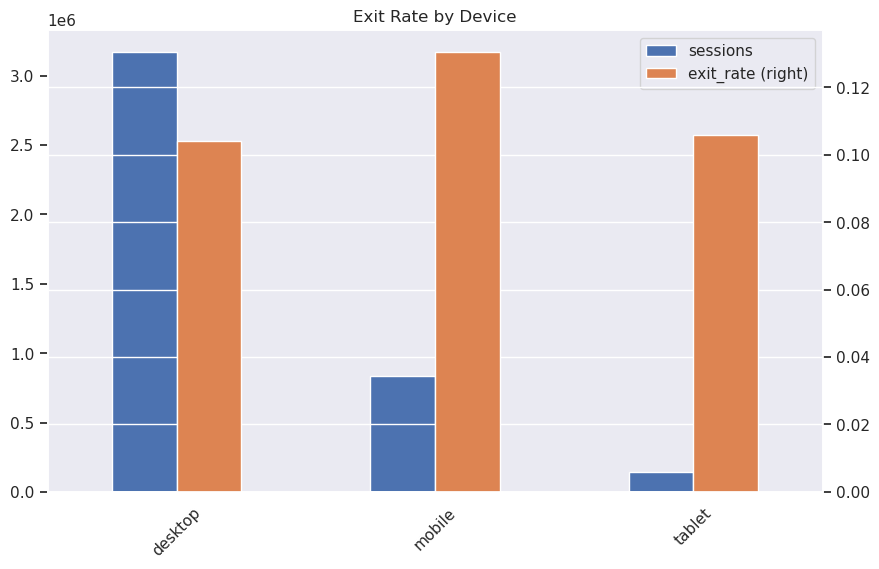

In [20]:
query = """ 
        SELECT 
            device.deviceCategory AS device,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY device
        ORDER BY sessions DESC
        """

result = client.query(query).result().to_dataframe()
fig, ax = plt.subplots(figsize=(10,6))
result.plot(y=['sessions','exit_rate'], x='device', kind='bar', title='Exit Rate by Device', secondary_y='exit_rate', ax=ax)
ax.set_xlabel('')
ax.set_xticklabels(labels=result['device'], rotation=45)
plt.show()

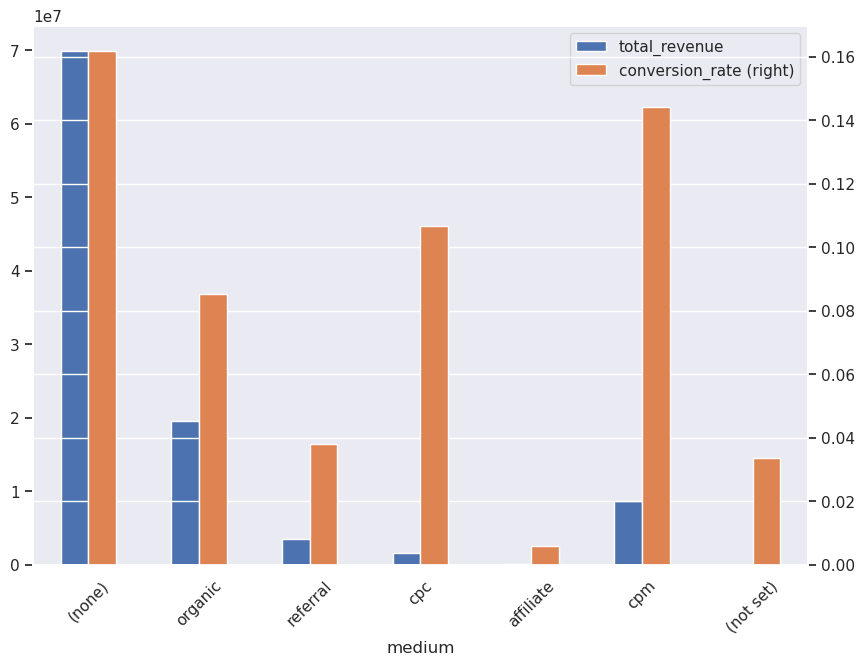

In [21]:
query = """
        SELECT 
            trafficSource.medium AS medium,
            COUNT(*) AS sessions,
            SUM(totals.bounces)/COUNT(*) AS exit_rate,
            SUM(totals.transactions) AS transactions,
            SUM(totals.totalTransactionRevenue)/1000000 AS total_revenue,
            SUM(totals.transactions)/COUNT(*) AS conversion_rate
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
        GROUP BY medium
        ORDER BY sessions DESC
        LIMIT 10
        """

result = client.query(query).result().to_dataframe()
fig, ax = plt.subplots(figsize=(10,7))
result.plot(y=['total_revenue', 'conversion_rate'], x='medium', kind='bar', secondary_y='conversion_rate', ax=ax)
ax.set_xticklabels(labels=result['medium'], rotation=45)
plt.show()

In [22]:
fig.show()

Identify Best-Selling Product Categories and Forecast Demand

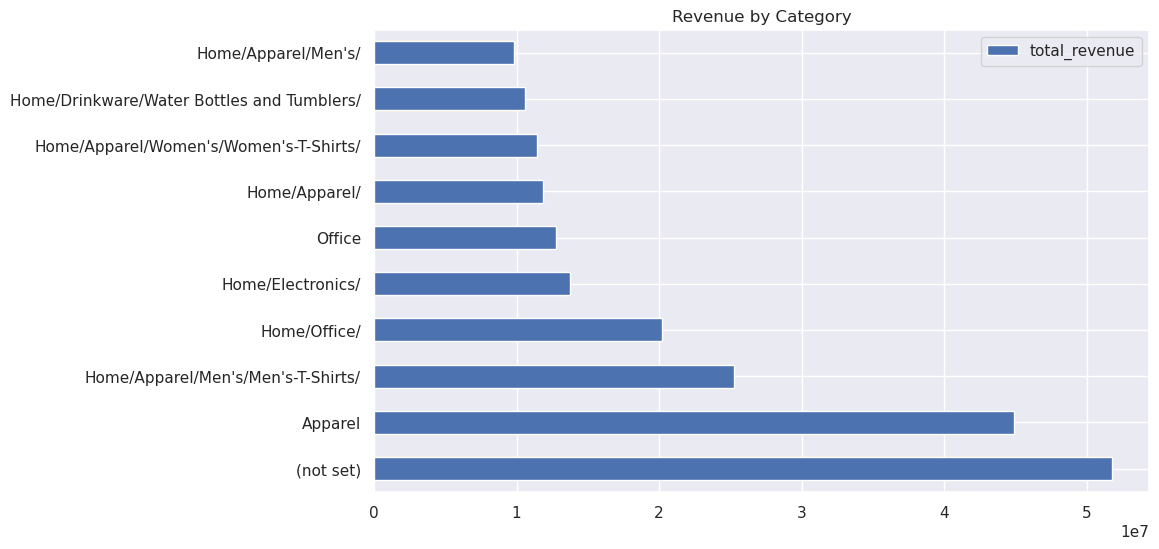

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
cat_result.plot(y='total_revenue', x='category', kind='barh', title='Revenue by Category', ax=ax)
ax.set_ylabel('')
plt.show()

<AxesSubplot:title={'center':'Electronics Weekly Moving Average'}, xlabel='date'>

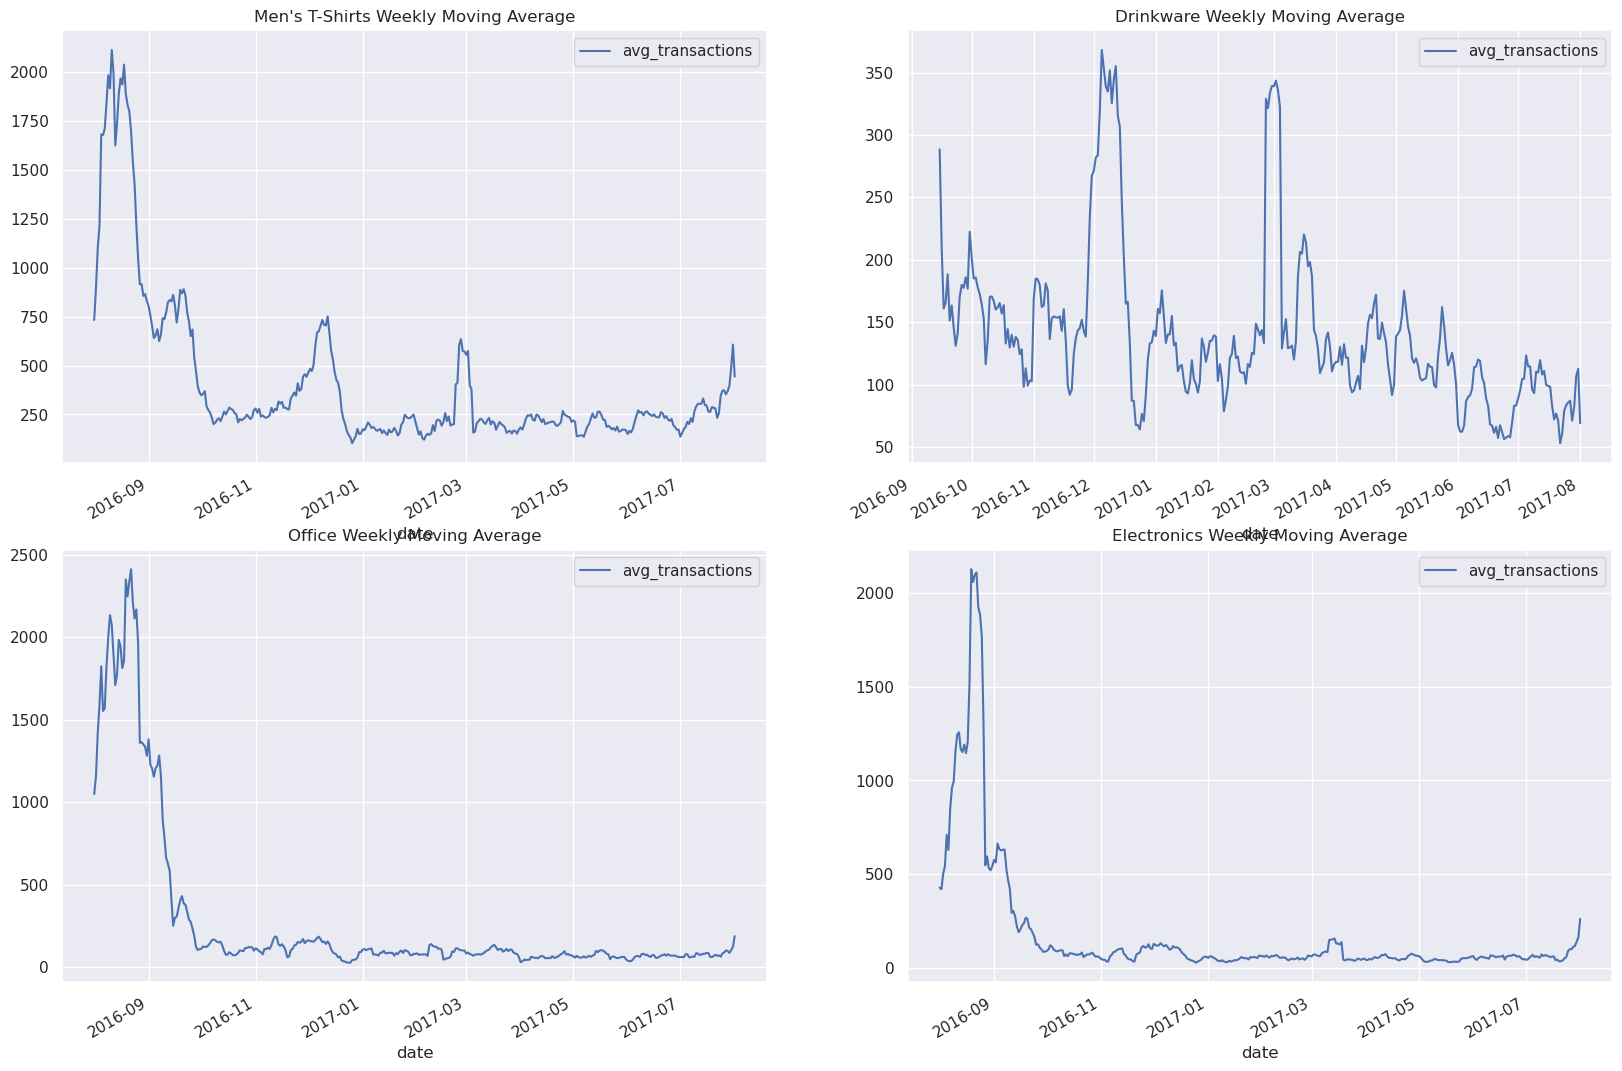

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,14))

# Men's T-shirts
query1 = """ 
        WITH daily_mens_tshirt_transactions AS
        (
        SELECT 
            date,
            SUM(totals.transactions) AS transactions
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Apparel/Men's/Men's-T-Shirts/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING    
                 ) AS avg_transactions
        FROM 
            daily_mens_tshirt_transactions
        """

result1 = client.query(query1).result().to_dataframe()
result1['date'] = pd.to_datetime(result1['date'])
ax1 = result1.plot(y='avg_transactions', x='date', kind='line', title='Men\'s T-Shirts Weekly Moving Average', ax=axes[0,0])

# Drinkware
query2 = """ 
        WITH daily_drinkware_transactions AS
        (
        SELECT 
            date,
            SUM(totals.transactions) AS transactions
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Drinkware/Water Bottles and Tumblers/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING    
                 ) AS avg_transactions
        FROM 
            daily_drinkware_transactions
        """

result2 = client.query(query2).result().to_dataframe()
result2['date'] = pd.to_datetime(result2['date'])
result2.plot(y='avg_transactions', x='date', kind='line', title='Drinkware Weekly Moving Average', ax=axes[0,1])

# Office Supplies
query3 = """ 
        WITH daily_office_transactions AS
        (
        SELECT 
            date,
            SUM(totals.transactions) AS transactions
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Office/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING    
                 ) AS avg_transactions
        FROM 
            daily_office_transactions
        """

result3 = client.query(query3).result().to_dataframe()
result3['date'] = pd.to_datetime(result3['date'])
result3.plot(y='avg_transactions', x='date', kind='line', title='Office Weekly Moving Average', ax=axes[1,0])

# Electronics
query4 = """ 
        WITH daily_electronics_transactions AS
        (
        SELECT 
            date,
            SUM(totals.transactions) AS transactions
        FROM 
            `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
                 UNNEST(hits) AS hits,
                 UNNEST(hits.product) AS product
        WHERE
            _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
            AND
            product.v2ProductCategory = "Home/Electronics/"
        GROUP BY date
        ORDER BY date
        )
        SELECT
            date,
            AVG(transactions)
            OVER (
                  ORDER BY date
                  ROWS BETWEEN CURRENT ROW AND 7 FOLLOWING    
                 ) AS avg_transactions
        FROM 
            daily_electronics_transactions
        """

result4 = client.query(query4).result().to_dataframe()
result4['date'] = pd.to_datetime(result4['date'])
result4.plot(y='avg_transactions', x='date', kind='line', title='Electronics Weekly Moving Average', ax=axes[1,1])

**Conclusion :**


The two of our best product categories have significant seasonal demand, and that traffic from paid advetising has the highest conversion rates, we can adjust the timing and content of our advertising campaigns to capitalize on this seasonal demand, and significantly improve sales.